In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 파일 불러오기

In [2]:
import pandas as pd

In [3]:
claim = pd.read_excel('1,2회 통합본2.xlsx')

## 문장 번호를 기준으로 리스트 묶기

In [4]:
claim = claim[['문장번호', '단어', 'BIO']]

In [5]:
claim

,문장번호,단어,BIO
0,1,1,O
1,1,.,O
2,1,카트로봇,B_TRM
3,1,을,O
4,1,이동,O
...,...,...,...
837514,76,를,O
837515,76,위한,O
837516,76,이동통신단말기,B_TRM
837517,76,의,O


In [6]:
claim.dtypes

문장번호     int64
단어      object
BIO     object
dtype: object

In [7]:
print('문장열의 중복을 제거한 값의 개수 : {}'.format(claim.문장번호.nunique()))
print('단어열의 중복을 제거한 값의 개수 : {}'.format(claim.단어.nunique()))
print('BIO열의 중복을 제거한 값의 개수 : {}'.format(claim.BIO.nunique()))

문장열의 중복을 제거한 값의 개수 : 1953
단어열의 중복을 제거한 값의 개수 : 13480
BIO열의 중복을 제거한 값의 개수 : 3


In [8]:
print('BIO 열의 각각의 값의 개수 카운트')
print('================================')
print(claim.groupby('BIO').size().reset_index(name='count'))

BIO 열의 각각의 값의 개수 카운트
     BIO   count
0  B_TRM   82607
1  I_TRM   70647
2      O  684265


# 특허 데이터를 리스트로 변환

In [9]:
claim_list = claim.values.tolist()

In [10]:
len(claim_list)

837519

# 단어를 문장 단위로 묶어주기 위한 코드

In [11]:
claim_middle = []
claim_middle.append(claim_list[0][1:])
claim_middle

[['1', 'O']]

## 문장 번호를 기준으로 묶기

In [12]:
claim_list2 = []
for i in range(len(claim_list)-1):
    if claim_list[i][0] == claim_list[i+1][0]:
        claim_middle.append(claim_list[i+1][1:])
    else:
        claim_list2.append(claim_middle)
        claim_middle=[]
        claim_middle.append(claim_list[i+1][1:])
claim_list2.append(claim_middle)

In [13]:
claim_list2[-1]

[['상기', 'O'],
 ['확인', 'O'],
 ['부', 'O'],
 ['에서', 'O'],
 ['확인', 'O'],
 ['된', 'O'],
 ['사용자', 'B_TRM'],
 ['의', 'O'],
 ['신분', 'O'],
 ['을', 'O'],
 ['공개', 'O'],
 ['하', 'O'],
 ['는', 'O'],
 ['신분', 'O'],
 ['공개', 'O'],
 ['부', 'O'],
 ['를', 'O'],
 ['더', 'O'],
 ['포함', 'O'],
 ['함', 'O'],
 ['을', 'O'],
 ['특징', 'O'],
 ['으로', 'O'],
 ['하', 'O'],
 ['는', 'O'],
 ['홈', 'B_TRM'],
 ['네트워크', 'I_TRM'],
 ['의', 'O'],
 ['가전기기', 'B_TRM'],
 ['제어', 'O'],
 ['를', 'O'],
 ['위한', 'O'],
 ['이동통신단말기', 'B_TRM'],
 ['의', 'O'],
 ['인증시스템', 'B_TRM']]

In [14]:
len(claim_list2)

14990

# 가끔가다 숫자가 문자로 인식 안되고 에러남. 따라서 문자가 아닌경우, 문자로 바꿔주는 작업 필요

In [15]:
for i in range(len(claim_list2)):
    for j in range(len(claim_list2[i])):
        if type(claim_list2[i][j][0]) != str:
            claim_list2[i][j][0] = str(claim_list2[i][j][0])

In [16]:
claim_list2[:10]

[[['1', 'O'],
  ['.', 'O'],
  ['카트로봇', 'B_TRM'],
  ['을', 'O'],
  ['이동', 'O'],
  ['시키', 'O'],
  ['는', 'O'],
  ['이', 'O'],
  ['동부', 'O']],
 [['카트로봇', 'B_TRM'],
  ['의', 'O'],
  ['주변', 'O'],
  ['에', 'O'],
  ['배치', 'O'],
  ['된', 'O'],
  ['장애물', 'O'],
  ['을', 'O'],
  ['센싱', 'B_TRM'],
  ['하', 'O'],
  ['는', 'O'],
  ['장애물', 'B_TRM'],
  ['센서', 'I_TRM']],
 [['카트로봇', 'B_TRM'],
  ['의', 'O'],
  ['주', 'O'],
  ['행면', 'O'],
  ['또는', 'O'],
  ['상기', 'O'],
  ['주', 'O'],
  ['행면', 'O'],
  ['의', 'O'],
  ['측면', 'O'],
  ['에', 'O'],
  ['배치', 'O'],
  ['된', 'O'],
  ['마커', 'B_TRM'],
  ['를', 'O'],
  ['촬영', 'O'],
  ['하', 'O'],
  ['는', 'O'],
  ['카메라', 'B_TRM'],
  ['센서', 'I_TRM']],
 [['상기', 'O'],
  ['카트로봇', 'B_TRM'],
  ['의', 'O'],
  ['핸들', 'B_TRM'],
  ['어셈블리', 'I_TRM'],
  ['에', 'O'],
  ['가해진', 'O'],
  ['힘', 'O'],
  ['의', 'O'],
  ['변화', 'O'],
  ['를', 'O'],
  ['센싱', 'B_TRM'],
  ['하', 'O'],
  ['는', 'O'],
  ['포스', 'B_TRM'],
  ['센서', 'I_TRM']],
 [['및', 'O'],
  ['상기', 'O'],
  ['카메라', 'B_TRM'],
  ['센서', 'I_TRM'],
  ['가', 'O'

훈련을 위해 단어와 태깅 정보를 분리시켜야 하기 때문에 zip 함수를 사용함

In [17]:
sentences, ner_tags = [], [] 
for tagged_sentence in claim_list2: # claim_list2를 1개씩 불러온다.
    sentence, tag_info = zip(*tagged_sentence) # 각 단어들은 sentence에 개체명 태깅 정보들은 tag_info에 저장.
    sentences.append(list(sentence)) #단어 정보만 저장한다.
    ner_tags.append(list(tag_info)) # 개체명 태깅 정보만 저장한다.

In [18]:
print(sentences[99])
print(ner_tags[99])

['및', '상기', '단말', '이', '상기', '캐릭터', '의', '변형', '된', '동작', '을', '영상', '으로', '디스플레이', '하', '는', '단계', '를', '포함', '하', '는', ',', '로봇', '시스템', '제어방법', '.']
['O', 'O', 'B_TRM', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B_TRM', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B_TRM', 'I_TRM', 'B_TRM', 'O']


## 데이터의 길이 분포 확인

샘플의 최대 길이 : 497
샘플의 평균 길이 : 55.871848


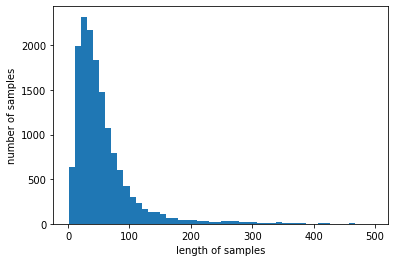

In [19]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## 토크나이저를 통한 정수 인코딩
Bi-LSTM 실험과 다르게 문장 데이터의 모든 단어들을 사용함

In [60]:
src_tokenizer = Tokenizer(oov_token='OOV') # 모든 단어를 사용하지만 인덱스 1에는 단어 'OOV'를 할당한다.
src_tokenizer.fit_on_texts(sentences)
tar_tokenizer = Tokenizer(lower=False) # 태깅 정보들은 내부적으로 대문자를 유지한채로 저장
tar_tokenizer.fit_on_texts(ner_tags)

문장 데이터에 대해서는 src_tokenizer를, 레이블에 해당되는 개체명 태깅 정보에 대해서는 tar_tokenizer를 사용합니다.

In [61]:
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 13004
개체명 태깅 정보 집합의 크기 : 4


앞서 src_tokenizer를 만들때 Tokenizer의 인자로 oov_token='OOV'를 선택했습니다. 이렇게 하면 인덱스1에 단어 'OOV'가 할당됩니다.

In [62]:
print('단어 OOV의 인덱스 : {}'.format(src_tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


### 정수 인코딩 수행

In [63]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(ner_tags)

이제 문장 데이터에 대해서 정수 인코딩이 수행된 결과는 X_train, 개체명 태깅 데이터에 대해서 정수 인코딩이 수행된 결과는 y_train에 저장되었습니다. 정수 인코딩이 되었는지 확인을 위해 임의로 첫번째 샘플을 출력해보겠습니다.

In [64]:
print(X_train[0])
print(y_train[0])

[16, 15, 1067, 9, 93, 100, 4, 27, 906]
[1, 1, 2, 1, 1, 1, 1, 1, 1]


모델 훈련 후 결과 확인을 위해 인덱스로부터 단어를 리턴하는 index_to_word를 만듭니다. 그와 동시에 뒤에서 사용할 index_to_ner도 만듭니다. 이때, 인덱스 0은 'PAD'란 단어를 할당해두겠습니다. index_to_ner은 개수가 적으니 출력까지 해봅시다.

In [65]:
index_to_word = src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word
index_to_ner[0]='PAD'

In [66]:
index_to_word

{1: 'OOV',
 2: '상기',
 3: '하',
 4: '는',
 5: ',',
 6: '의',
 7: '에',
 8: '를',
 9: '을',
 10: '제',
 11: ')',
 12: '(',
 13: '되',
 14: '된',
 15: '.',
 16: '1',
 17: '있',
 18: '으로',
 19: '여',
 20: '항',
 21: '및',
 22: '포함',
 23: '어서',
 24: '고',
 25: '단계',
 26: '정보',
 27: '이',
 28: '데이터',
 29: '가',
 30: '2',
 31: '한',
 32: '와',
 33: '로',
 34: '특징',
 35: '것',
 36: '에서',
 37: '은',
 38: '부',
 39: '장치',
 40: '방법',
 41: '과',
 42: '하나',
 43: '들',
 44: '도록',
 45: '시스템',
 46: '생성',
 47: '며',
 48: '중',
 49: '로봇',
 50: '서비스',
 51: '제공',
 52: '사용자',
 53: '서버',
 54: '또는',
 55: '학습',
 56: '기',
 57: '3',
 58: '복수',
 59: '인',
 60: '대한',
 61: '위치',
 62: '제어',
 63: '이용',
 64: '로부터',
 65: '적어도',
 66: '저장',
 67: '어',
 68: '클라우드',
 69: '영상',
 70: '값',
 71: '입력',
 72: '각각',
 73: '설정',
 74: '4',
 75: '위한',
 76: '기반',
 77: '사용',
 78: '더',
 79: '분석',
 80: '5',
 81: '이미지',
 82: '이상',
 83: '구성',
 84: '가능',
 85: '모듈',
 86: '수신',
 87: '단말',
 88: '따라',
 89: '통해',
 90: '수행',
 91: '연결',
 92: '적',
 93: '이동',
 94: '형성',
 95: '

In [67]:
index_to_ner

{1: 'O', 2: 'B_TRM', 3: 'I_TRM', 0: 'PAD'}

## 디코딩 해보기

index_to_word를 만들었으니 시험삼아 첫번째 샘플에 대해서 다시 디코딩(정수에서 다시 텍스트 데이터로 변환) 작업을 해보겠습니다.

In [68]:
decoded = []
for index in X_train[0] : # 첫번째 샘플 안의 인덱스들에 대해서
    decoded.append(index_to_word[index]) # 다시 단어로 변환

print('기존의 문장 : {}'.format(sentences[0]))
print('디코딩 문장 : {}'.format(decoded))

기존의 문장 : ['1', '.', '카트로봇', '을', '이동', '시키', '는', '이', '동부']
디코딩 문장 : ['1', '.', '카트로봇', '을', '이동', '시키', '는', '이', '동부']


이제 X 데이터와 y 데이터가 구성되었습니다. 이제 패딩 작업을 진행해봅시다.   
가장 긴 문장은 539이기 때문에 max_len을 539로 지정

In [69]:
max_len = 497
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
# X_train의 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자 0으로 채움.
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)
# y_train의 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자0으로 채움.

# 훈련데이터와 테스트 데이터 나누기

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=777)

### 데이터 크기 확인

In [71]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (11992, 497)
훈련 샘플 레이블의 크기 : (11992, 497)
테스트 샘플 문장의 크기 : (2998, 497)
테스트 샘플 레이블의 크기 : (2998, 497)


# 단어 임베딩 모델 불러오는 부분

In [72]:
from gensim.models import FastText
model2 = FastText.load('claim_all_fasttext2.model')
fst = model2.wv

In [73]:
fst['상기']

array([ 0.16756165,  0.05714658,  0.07865506, -0.03167634,  0.02182262,
       -0.02898432,  0.07114287,  0.13591696, -0.05356216, -0.02251537,
        0.03542864,  0.02037133,  0.03781034, -0.01357991,  0.02126999,
       -0.00931188,  0.08935541, -0.13029069,  0.04522721, -0.05383443,
        0.07668404,  0.04656935, -0.11948363, -0.01898138, -0.06512199,
        0.066138  ,  0.0796817 ,  0.03320896, -0.03672972, -0.05529027,
       -0.03769217, -0.04004775, -0.03075721, -0.03610414, -0.01259165,
       -0.01490743, -0.11192892, -0.06503962, -0.09039722,  0.02216401,
        0.01347535, -0.007064  ,  0.03940094, -0.07772198,  0.10003711,
       -0.00435756, -0.10838622, -0.06475853, -0.05313787, -0.02620797,
       -0.00796872, -0.05080613, -0.092714  ,  0.07244455, -0.04276907,
        0.01688574,  0.13214697, -0.0083761 , -0.07401914, -0.0470617 ,
        0.08727206, -0.07402598,  0.03524953, -0.0993082 , -0.11049774,
       -0.05604599,  0.10930218, -0.08919376,  0.03708011,  0.06

In [74]:
def get_vector(word):
    if word in fst:
        return fst[word]
    else:
        return None

In [75]:
# 새로운 단어 벡터 배열
em_mat = np.zeros((vocab_size, 300))

for i, word in index_to_word.items():
    temp = get_vector(word)
    if temp is not None:
        em_mat[i] = temp

In [76]:
em_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00089912, -0.00050632, -0.00025789, ..., -0.00057456,
         0.00054792, -0.00122204],
       [ 0.16756165,  0.05714658,  0.07865506, ..., -0.02323117,
        -0.03045698, -0.05592453],
       ...,
       [-0.00519663, -0.04751154,  0.00523437, ...,  0.06543908,
        -0.16812488,  0.08966506],
       [ 0.01882859, -0.00284936,  0.07920282, ..., -0.03992578,
         0.10441491, -0.06111355],
       [ 0.00027644, -0.0013919 ,  0.00031842, ...,  0.00189565,
        -0.00107008,  0.00126762]])

In [77]:
em_mat.shape

(13004, 300)

# 양방향 LSTM + CRF를 이용한 개체명 인식

In [78]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras_contrib.layers import CRF

## 정수 인코딩된 태그를 다시 태깅 정보로 변경

In [79]:
def sequences_to_tag(sequences): # 예측값을 index_to_tag를 사용하여 태깅 정보로 변경하는 함수.
    result = []
    for sequence in sequences: # 전체 시퀀스로부터 시퀀스를 하나씩 꺼낸다.
        temp = []
        for pred in sequence: # 시퀀스로부터 예측값을 하나씩 꺼낸다.
            pred_index = np.argmax(pred) # 예를 들어 [0, 0, 1, 0 ,0]라면 1의 인덱스인 2를 리턴한다.
            temp.append(index_to_ner[pred_index].replace("PAD", "O"))
        result.append(temp)
    return result

모델에 양방향 LSTM을 사용하고 모델의 출력층에 CRF층을 배치

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
import time

start = time.time()
skf = KFold(n_splits=10, shuffle=True, random_state=7)
y_train = to_categorical(y_train, num_classes=tag_size)

mid_pred = []
mid_test=[]
real_pred=[]
real_test=[]
precision = []
recall = []
f1 = []

for train, validation in skf.split(X_train, y_train):
    #history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.1, verbose=1)
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=300, weights=[em_mat], input_length=max_len, mask_zero=True))
    model.add(Bidirectional(LSTM(units=256, return_sequences=True, recurrent_dropout=0.1)))
    model.add(TimeDistributed(Dense(50, activation="relu")))
    crf = CRF(tag_size)
    model.add(crf)
    model.compile(optimizer="Adam", loss=crf.loss_function, metrics=[crf.accuracy])
    model.fit(X_train[train], y_train[train], batch_size=32, epochs=12, verbose=1, validation_data=(X_train[validation], y_train[validation])) 
    
    y_predicted = model.predict(X_train[validation])
    pred_tags = sequences_to_tag(y_predicted)
    test_tags = sequences_to_tag(y_train[validation])
    
    pred_tags = sum(pred_tags, [])
    test_tags = sum(test_tags, [])
    
    mid_pred = []
    mid_test=[]
    real_pred=[]
    real_test=[]
    
    tp = []
    fp = []
    fn = []

    for i in range(len(test_tags)-1):
        if test_tags[i][0] == 'o':
            break
        if test_tags[i][0] != 'O':
            mid_pred.append(pred_tags[i])
            mid_test.append(test_tags[i])
            if test_tags[i+1][0] != 'I':
                real_pred.append(mid_pred)
                mid_pred = []
                real_test.append(mid_test)
                mid_test = []
        else:
            real_pred.append(pred_tags[i])
            real_test.append(test_tags[i])

    if len(mid_pred) != 0 and len(mid_test) != 0:       
        real_pred.append(mid_pred)
        real_test.append(mid_test)


    for i in range(len(real_test)):
        if type(real_test[i]) == list:
            if real_test[i] == real_pred[i]:
                tp.append('tp')
            else:
                fn.append('fn')
        elif type(real_test[i]) == str:
            if real_test[i][0] == 'O' and (real_pred[i][0] == 'B' or real_pred[i][0]=='I'):
                fp.append('fp')

    precision.append(len(tp)/(len(tp)+len(fp)))
    recall.append(len(tp)/(len(tp)+len(fn)))
    f1.append(2*precision[-1]*recall[-1]/(recall[-1]+precision[-1]))

# 실행 결과 출력
end = time.time() - start
print(end)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Train on 10792 samples, validate on 1200 samples
Epoch 1/12
10792/10792 [==============================] - 514s 48ms/step - loss: 21.8328 - crf_viterbi_accuracy: 0.9219 - val_loss: 22.1303 - val_crf_viterbi_accuracy: 0.9494
Epoch 2/12
10792/10792 [==============================] - 512s 47ms/step - loss: 21.7400 - crf_viterbi_accuracy: 0.9583 - val_loss: 22.1099 - val_crf_viterbi_accuracy: 0.9603
Epoch 3/12
10792/10792 [==============================] - 512s 47ms/step - loss: 21.7166 - crf_viterbi_accuracy: 0.9674 - val_loss: 22.1003 - val_crf_viterbi_accuracy: 0.9632
Epoch 4/12
10792/10792 [==============================] - 509s 47ms/step - loss: 21.7025 - crf_viterbi_accuracy: 0.9732 - val_loss: 22.0954 - val_crf_viterbi_accuracy: 0.9653
Epoch 5/12
10792/10792 [==============================] - 525s 49ms/step - loss: 21.6920 - crf_viterbi_accuracy: 0.9773 - val_loss: 22.0935 - val_crf_viterbi_accuracy: 0.9671
Epoch 6/12
10792/10792 [==============================] - 596s 55ms/step - l

/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Train on 10792 samples, validate on 1200 samples
Epoch 1/12
10792/10792 [==============================] - 607s 56ms/step - loss: 22.0732 - crf_viterbi_accuracy: 0.9088 - val_loss: 20.5526 - val_crf_viterbi_accuracy: 0.9493
Epoch 2/12
10792/10792 [==============================] - 603s 56ms/step - loss: 21.9376 - crf_viterbi_accuracy: 0.9557 - val_loss: 20.5232 - val_crf_viterbi_accuracy: 0.9599
Epoch 3/12
10792/10792 [==============================] - 601s 56ms/step - loss: 21.9090 - crf_viterbi_accuracy: 0.9658 - val_loss: 20.5142 - val_crf_viterbi_accuracy: 0.9634
Epoch 4/12
10792/10792 [==============================] - 600s 56ms/step - loss: 21.8914 - crf_viterbi_accuracy: 0.9719 - val_loss: 20.5043 - val_crf_viterbi_accuracy: 0.9681
Epoch 5/12
10792/10792 [==============================] - 603s 56ms/step - loss: 21.8792 - crf_viterbi_accuracy: 0.9766 - val_loss: 20.5020 - val_crf_viterbi_accuracy: 0.9688
Epoch 6/12
10792/10792 [==============================] - 515s 48ms/step - l

/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Train on 10793 samples, validate on 1199 samples
Epoch 1/12
10793/10793 [==============================] - 362s 34ms/step - loss: 21.8167 - crf_viterbi_accuracy: 0.9152 - val_loss: 22.4752 - val_crf_viterbi_accuracy: 0.9519
Epoch 2/12
10793/10793 [==============================] - 357s 33ms/step - loss: 21.7095 - crf_viterbi_accuracy: 0.9579 - val_loss: 22.4516 - val_crf_viterbi_accuracy: 0.9610
Epoch 3/12
10793/10793 [==============================] - 358s 33ms/step - loss: 21.6857 - crf_viterbi_accuracy: 0.9673 - val_loss: 22.4399 - val_crf_viterbi_accuracy: 0.9660
Epoch 4/12
10793/10793 [==============================] - 358s 33ms/step - loss: 21.6689 - crf_viterbi_accuracy: 0.9733 - val_loss: 22.4354 - val_crf_viterbi_accuracy: 0.9676
Epoch 5/12
10793/10793 [==============================] - 359s 33ms/step - loss: 21.6582 - crf_viterbi_accuracy: 0.9770 - val_loss: 22.4350 - val_crf_viterbi_accuracy: 0.9686
Epoch 6/12
10793/10793 [==============================] - 352s 33ms/step - l

/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Train on 10793 samples, validate on 1199 samples
Epoch 1/12
10793/10793 [==============================] - 362s 34ms/step - loss: 21.9595 - crf_viterbi_accuracy: 0.9220 - val_loss: 21.1770 - val_crf_viterbi_accuracy: 0.9488
Epoch 2/12
10793/10793 [==============================] - 357s 33ms/step - loss: 21.8564 - crf_viterbi_accuracy: 0.9585 - val_loss: 21.1585 - val_crf_viterbi_accuracy: 0.9550
Epoch 3/12
10793/10793 [==============================] - 357s 33ms/step - loss: 21.8299 - crf_viterbi_accuracy: 0.9685 - val_loss: 21.1454 - val_crf_viterbi_accuracy: 0.9615
Epoch 4/12
10793/10793 [==============================] - 357s 33ms/step - loss: 21.8136 - crf_viterbi_accuracy: 0.9741 - val_loss: 21.1434 - val_crf_viterbi_accuracy: 0.9631
Epoch 5/12
10793/10793 [==============================] - 357s 33ms/step - loss: 21.8022 - crf_viterbi_accuracy: 0.9781 - val_loss: 21.1361 - val_crf_viterbi_accuracy: 0.9654
Epoch 6/12
10793/10793 [==============================] - 355s 33ms/step - l

/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Train on 10793 samples, validate on 1199 samples
Epoch 1/12
10793/10793 [==============================] - 339s 31ms/step - loss: 21.9793 - crf_viterbi_accuracy: 0.9126 - val_loss: 21.2333 - val_crf_viterbi_accuracy: 0.9365
Epoch 2/12
10793/10793 [==============================] - 341s 32ms/step - loss: 21.8527 - crf_viterbi_accuracy: 0.9577 - val_loss: 21.1933 - val_crf_viterbi_accuracy: 0.9574
Epoch 3/12
10793/10793 [==============================] - 341s 32ms/step - loss: 21.8272 - crf_viterbi_accuracy: 0.9668 - val_loss: 21.1834 - val_crf_viterbi_accuracy: 0.9613
Epoch 4/12
10793/10793 [==============================] - 341s 32ms/step - loss: 21.8117 - crf_viterbi_accuracy: 0.9727 - val_loss: 21.1762 - val_crf_viterbi_accuracy: 0.9652
Epoch 5/12
10793/10793 [==============================] - 342s 32ms/step - loss: 21.7998 - crf_viterbi_accuracy: 0.9771 - val_loss: 21.1785 - val_crf_viterbi_accuracy: 0.9650
Epoch 6/12
10793/10793 [==============================] - 341s 32ms/step - l

/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Train on 10793 samples, validate on 1199 samples
Epoch 1/12
10793/10793 [==============================] - 349s 32ms/step - loss: 21.8350 - crf_viterbi_accuracy: 0.9133 - val_loss: 22.3721 - val_crf_viterbi_accuracy: 0.9533
Epoch 2/12
10793/10793 [==============================] - 342s 32ms/step - loss: 21.7203 - crf_viterbi_accuracy: 0.9581 - val_loss: 22.3459 - val_crf_viterbi_accuracy: 0.9623
Epoch 3/12
10793/10793 [==============================] - 333s 31ms/step - loss: 21.6950 - crf_viterbi_accuracy: 0.9672 - val_loss: 22.3370 - val_crf_viterbi_accuracy: 0.9645
Epoch 4/12
10793/10793 [==============================] - 342s 32ms/step - loss: 21.6806 - crf_viterbi_accuracy: 0.9727 - val_loss: 22.3299 - val_crf_viterbi_accuracy: 0.9673
Epoch 5/12
10793/10793 [==============================] - 343s 32ms/step - loss: 21.6693 - crf_viterbi_accuracy: 0.9772 - val_loss: 22.3255 - val_crf_viterbi_accuracy: 0.9698
Epoch 6/12
10793/10793 [==============================] - 343s 32ms/step - l

/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Train on 10793 samples, validate on 1199 samples
Epoch 1/12
10793/10793 [==============================] - 290s 27ms/step - loss: 21.8345 - crf_viterbi_accuracy: 0.9083 - val_loss: 22.5293 - val_crf_viterbi_accuracy: 0.9484
Epoch 2/12
10793/10793 [==============================] - 283s 26ms/step - loss: 21.7070 - crf_viterbi_accuracy: 0.9575 - val_loss: 22.5087 - val_crf_viterbi_accuracy: 0.9569
Epoch 3/12
10793/10793 [==============================] - 284s 26ms/step - loss: 21.6814 - crf_viterbi_accuracy: 0.9668 - val_loss: 22.4955 - val_crf_viterbi_accuracy: 0.9628
Epoch 4/12
10793/10793 [==============================] - 283s 26ms/step - loss: 21.6644 - crf_viterbi_accuracy: 0.9733 - val_loss: 22.4906 - val_crf_viterbi_accuracy: 0.9662
Epoch 5/12
10793/10793 [==============================] - 283s 26ms/step - loss: 21.6535 - crf_viterbi_accuracy: 0.9769 - val_loss: 22.4861 - val_crf_viterbi_accuracy: 0.9672
Epoch 6/12
10793/10793 [==============================] - 283s 26ms/step - l

/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Train on 10793 samples, validate on 1199 samples
Epoch 1/12
10793/10793 [==============================] - 291s 27ms/step - loss: 21.8010 - crf_viterbi_accuracy: 0.9144 - val_loss: 22.6437 - val_crf_viterbi_accuracy: 0.9493
Epoch 2/12
10793/10793 [==============================] - 283s 26ms/step - loss: 21.6877 - crf_viterbi_accuracy: 0.9587 - val_loss: 22.6210 - val_crf_viterbi_accuracy: 0.9582
Epoch 3/12
10793/10793 [==============================] - 283s 26ms/step - loss: 21.6637 - crf_viterbi_accuracy: 0.9681 - val_loss: 22.6156 - val_crf_viterbi_accuracy: 0.9593
Epoch 4/12
10793/10793 [==============================] - 284s 26ms/step - loss: 21.6487 - crf_viterbi_accuracy: 0.9733 - val_loss: 22.6050 - val_crf_viterbi_accuracy: 0.9654
Epoch 5/12
10793/10793 [==============================] - 283s 26ms/step - loss: 21.6373 - crf_viterbi_accuracy: 0.9778 - val_loss: 22.6086 - val_crf_viterbi_accuracy: 0.9648
Epoch 6/12
10793/10793 [==============================] - 283s 26ms/step - l

/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Train on 10793 samples, validate on 1199 samples
Epoch 1/12
10793/10793 [==============================] - 295s 27ms/step - loss: 21.9708 - crf_viterbi_accuracy: 0.9143 - val_loss: 21.1414 - val_crf_viterbi_accuracy: 0.9501
Epoch 2/12
10793/10793 [==============================] - 287s 27ms/step - loss: 21.8572 - crf_viterbi_accuracy: 0.9580 - val_loss: 21.1163 - val_crf_viterbi_accuracy: 0.9584
Epoch 3/12
10793/10793 [==============================] - 286s 27ms/step - loss: 21.8330 - crf_viterbi_accuracy: 0.9669 - val_loss: 21.1036 - val_crf_viterbi_accuracy: 0.9628
Epoch 4/12
10793/10793 [==============================] - 286s 27ms/step - loss: 21.8175 - crf_viterbi_accuracy: 0.9728 - val_loss: 21.1003 - val_crf_viterbi_accuracy: 0.9658
Epoch 5/12
10793/10793 [==============================] - 287s 27ms/step - loss: 21.8057 - crf_viterbi_accuracy: 0.9771 - val_loss: 21.0991 - val_crf_viterbi_accuracy: 0.9658
Epoch 6/12
10793/10793 [==============================] - 287s 27ms/step - l

/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Train on 10793 samples, validate on 1199 samples
Epoch 1/12
10793/10793 [==============================] - 293s 27ms/step - loss: 21.8728 - crf_viterbi_accuracy: 0.9185 - val_loss: 21.8081 - val_crf_viterbi_accuracy: 0.9508
Epoch 2/12
10793/10793 [==============================] - 286s 26ms/step - loss: 21.7746 - crf_viterbi_accuracy: 0.9589 - val_loss: 21.7893 - val_crf_viterbi_accuracy: 0.9575
Epoch 3/12
10793/10793 [==============================] - 286s 27ms/step - loss: 21.7513 - crf_viterbi_accuracy: 0.9686 - val_loss: 21.7799 - val_crf_viterbi_accuracy: 0.9610
Epoch 4/12
10793/10793 [==============================] - 286s 26ms/step - loss: 21.7369 - crf_viterbi_accuracy: 0.9741 - val_loss: 21.7725 - val_crf_viterbi_accuracy: 0.9649
Epoch 5/12
10793/10793 [==============================] - 286s 26ms/step - loss: 21.7270 - crf_viterbi_accuracy: 0.9777 - val_loss: 21.7750 - val_crf_viterbi_accuracy: 0.9628
Epoch 6/12
10793/10793 [==============================] - 286s 26ms/step - l

In [ ]:
# 여기는 kfold 아님(같이 돌리면 안됨)
y_train = to_categorical(y_train, num_classes=tag_size)
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=300, weights=[em_mat], input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(units=512, return_sequences=True, recurrent_dropout=0.1)))
model.add(TimeDistributed(Dense(100, activation="relu")))
crf = CRF(tag_size)
model.add(crf)
model.compile(optimizer="Adam", loss=crf.loss_function, metrics=[crf.accuracy])

# 학습
model.fit(X_train, y_train, batch_size=32, epochs=12, validation_split=0.1, verbose=1) 

/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Train on 10792 samples, validate on 1200 samples
Epoch 1/12
10792/10792 [==============================] - 990s 92ms/step - loss: 21.8202 - crf_viterbi_accuracy: 0.9228 - val_loss: 22.3699 - val_crf_viterbi_accuracy: 0.9503
Epoch 2/12
10792/10792 [==============================] - 996s 92ms/step - loss: 21.7195 - crf_viterbi_accuracy: 0.9591 - val_loss: 22.3462 - val_crf_viterbi_accuracy: 0.9588
Epoch 3/12
10792/10792 [==============================] - 1221s 113ms/step - loss: 21.6935 - crf_viterbi_accuracy: 0.9691 - val_loss: 22.3394 - val_crf_viterbi_accuracy: 0.9617
Epoch 4/12
10792/10792 [==============================] - 1429s 132ms/step - loss: 21.6777 - crf_viterbi_accuracy: 0.9744 - val_loss: 22.3303 - val_crf_viterbi_accuracy: 0.9655
Epoch 5/12
10792/10792 [==============================] - 1417s 131ms/step - loss: 21.6662 - crf_viterbi_accuracy: 0.9786 - val_loss: 22.3274 - val_crf_viterbi_accuracy: 0.9669
Epoch 6/12
10792/10792 [==============================] - 1422s 132ms/

In [41]:
precision

[0.8476932477849068,
 0.8642441860465117,
 0.8735541118681667,
 0.8279121490130664,
 0.8448152902581657,
 0.8473548582689101,
 0.8769162735849056,
 0.8926509595880793,
 0.8544404332129963,
 0.8674945215485756]

# 테스트 (B, I 계산)

In [ ]:
y_test = to_categorical(y_test, num_classes=tag_size)

In [ ]:
y_predicted = model.predict(X_test)
# 학습된 모델을 사용하여 출력된 예측 개체명
pred_tags = sequences_to_tag(y_predicted)
# 정답 개체명
test_tags = sequences_to_tag(y_test)

In [ ]:
test_tags[0]

In [ ]:
pred_tags[0]

In [ ]:
len(pred_tags)

# 정확도 계산하는 부분

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
import time

start = time.time()

# 필요없어.....
acc = []
accuracy = []

# 중간 결과 저장하는 리스트
mid_pred = []
mid_test=[]

# 최종 결과 저장하는 리스트
real_pred=[]
real_test=[]

# 정확도 계산 결과 저장
precision = []
recall = []
f1 = []

# 1차원 리스트로 변환
pred_tags = sum(pred_tags, [])
test_tags = sum(test_tags, [])

# 혼동행렬값 저장하는 리스트
tp = []
fp = []
fn = []


for i in range(len(test_tags)-1):
    if test_tags[i][0] != 'O':
        mid_pred.append(pred_tags[i])
        mid_test.append(test_tags[i])
        
        if test_tags[i+1][0] != 'I':
            real_pred.append(mid_pred)
            mid_pred = []
            real_test.append(mid_test)
            mid_test = []
            
    else:
        real_pred.append(pred_tags[i])
        real_test.append(test_tags[i])

if len(mid_pred) != 0 and len(mid_test) != 0:       
    real_pred.append(mid_pred)
    real_test.append(mid_test)


for i in range(len(real_test)):
    if type(real_test[i]) == list:
        if real_test[i] == real_pred[i]:
            tp.append('tp')
        else:
            fn.append('fn')
    elif type(real_test[i]) == str:
        if real_test[i][0] == 'O' and (real_pred[i][0] == 'B' or real_pred[i][0]=='I'):
            fp.append('fp')

            
precision.append(len(tp)/(len(tp)+len(fp)))
recall.append(len(tp)/(len(tp)+len(fn)))
f1.append(2*precision[-1]*recall[-1]/(recall[-1]+precision[-1]))

# 전체 검증 결과 출력
print('\nK-fold cross validation Accuracy: {}'.format(accuracy))
end = time.time() - start
print(end)

In [ ]:
f1

In [ ]:
recall

In [ ]:
precision